<a href="https://colab.research.google.com/github/safikhanSoofiyani/CS6910-Assignment1/blob/main/CS6910_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Feed Forward Neural Network</h1>

Work Done by:<br>
<ul> 
<li>Mohammed Safi Ur Rahman Khan - CS21M035 </li>
<li>Vamsi Sai Krishna Malineni  - OE20S302 </li>

The goal of this work is twofold: <br>
(i) implement and use gradient descent (and its variants) with backpropagation for a classification task <br>
(ii) Getting familiar with wandb which is a cool tool for running and keeping track of a large number of experiments

In this project we have implemented a feedforward neural network and written the backpropagation code for training the network. We have used numpy for all matrix/vector operations. We have not used any automatic differentiation packages.<br> <br>
This network is trained and tested using the Fashion-MNIST dataset. Specifically, given an input image (28 x 28 = 784 pixels) from the Fashion-MNIST dataset, the network is trained to classify the image into 1 of 10 classes.

The numbering of various sections of this document are done in accordance with the instructions and question numbers from the below document:<br> 
https://wandb.ai/miteshk/assignments/reports/Assignment-1--VmlldzozNjk4NDE?accessToken=r7ndsh8lf4wlxyjln7phvvfb8ftvc0n4lyn4tiowdg06hhzpzfzki4jrm28wqh44

<h3>Importing necessary libraries.</h3>

In [ ]:
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import copy 
from tqdm import tqdm
import random
import tensorflow as tf
import seaborn as sn

<h3>Installing and importing wandb</h3>

Wandb is used to keep track of various experiments performed and for efficient logging while doing hyperparameter tuning. <br>
The report for this project is also created using wandb

In [ ]:
!pip install wandb -qqq
import wandb

<h2>1. About the Dataset</h2>

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.<br>
<br>
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. <br><br>

<b>Labels:</b>

Each training and test example is assigned to one of the following labels:
<ul>
<li> T-shirt/top
<li> Trouser
<li> Pullover
<li> Dress
<li> Coat
<li> Sandal
<li> Shirt
<li> Sneaker
<li> Bag
<li> Ankle boot
</ul>

Source: https://www.kaggle.com/zalando-research/fashionmnist

<h3>Preparing dataset</h3>

In [ ]:
from sklearn.model_selection import train_test_split
#sklearn library is used only for train test validation split


def prepare_data():

  '''This function is used to load the data, define the class labels, performing
      the train-test-validation split, normalizing the data, flattening each data
      point, converting the class labels to one hot encoded vector.

      It return all the split data sets '''


  # Loading data from online source
  (train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

  # Defining labels for data
  num_classes = 10
  labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

  print("Number of data points in train data (initially) - ", len(train_x))
  print("Number of data points in test data (initially) - ", len(test_x))


  #performing the train-validation split
  train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=40)
  

  print("Shape of each image - 28x28" )
  image_shape=train_x.shape[1]*train_x.shape[2]
  print("shape of each image (1D) - ",image_shape)
  
  #storing the number of points in each set
  train_image_count=len(train_x)
  val_image_count = len(val_x)
  test_image_count=len(test_x)
  
  # Creating a matrix of image data 
  # each image is represented as a row by flattening the matrix: converting (60000,28,28) tensor to (60000,784) matrix
  X_train=np.zeros((train_image_count,image_shape))
  X_val=np.zeros((val_image_count,image_shape))
  X_test=np.zeros((test_image_count,image_shape))
  
  # converting the images into grayscale by normalizing
  for i in range(train_image_count):
    X_train[i]=(copy.deepcopy(train_x[i].flatten()))/255.0 
  for i in range(val_image_count):
    X_val[i]=(copy.deepcopy(val_x[i].flatten()))/255.0
  for i in range(test_image_count):
    X_test[i]=(copy.deepcopy(test_x[i].flatten()))/255.0
  


  #One hot encoding the label vectors to represent a probability distribution
  y_train = np.zeros((train_y.size, 10))
  y_train[np.arange(train_y.size), train_y] = 1

  y_val = np.zeros((val_y.size, 10))
  y_val[np.arange(val_y.size), val_y] = 1

  y_test = np.zeros((test_y.size, 10))
  y_test[np.arange(test_y.size), test_y] = 1

  

  #returning all the datasets along with the labels
  return X_train,X_val,X_test,y_train,y_val,y_test,labels
  

<h3>Plotting images locally</h3>

In [ ]:
def plot_locally():

  '''This function is used to plot a single image of each class label on the 
  local machine'''

  #getting all the datasets
  xtrain, xval, xtest, ytrain, yval, ytest, labels = prepare_data()

  # Creating training dataset
  train=np.asarray(list(zip(xtrain,ytrain)))

  # plotting a single image from each class
  sample_images=[]
  wandb_arr=[]
  i=1
  plt.suptitle("Plotting image of each class from Fashion MNIST Dataset")

  while(len(sample_images)!=10):
    n=random.randrange(0,len(train))
    lab_index=np.asarray(np.nonzero(train[n][1]))[0][0]
    
    if(lab_index not in sample_images):
      plt.subplot(3,5,i)
      sample_images.append(lab_index)
      plt.title(labels[lab_index])
      plt.axis(False)
      plt.imshow(train[n][0].reshape((28,28)))
      i=i+1

4431872/4422102 [==============================] - 0s 0us/step
Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
shape of each image (1D) -  784


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


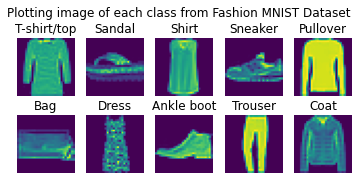

In [ ]:
plot_locally()

<h3>Plotting images via wandb</h3>

In [ ]:
# Forcing Relogin to ensure that you are logging into your account alone,
!wandb login --relogin
# Find your API Key and paste it in the run box

# You can change the entity name and project name 
entity_name="safi-vamsi-cs6910"

project_name="Assignment 1"

In [ ]:
def plot_images_wandb(entity_name,project_name):
  # Here we are implementing the same above logic but plotting all the images on
  # Wandb.

  # Enter the entity and project details from wandb.ai
  wandb.init(entity=entity_name,project=project_name, name="log_images")

  # Loading dataset
  xtrain, xval, xtest, ytrain, yval, ytest, labels = prepare_data()

  # Creating training dataset
  train = np.asarray(list(zip(xtrain,ytrain)))


  sample_images=[]
  wandb_arr=[]
  i=1
  plt.suptitle("Plotting image of each class from Fashion MNIST Dataset")
  while(len(sample_images)!=10):
    n = random.randrange(0,len(train))
    lab_index = np.asarray(np.nonzero(train[n][1]))[0][0]
    if(lab_index not in sample_images):
      sample_images.append(lab_index)
      wandb_arr.append(wandb.Image(train[n][0].reshape((28,28)), caption=labels[lab_index]))
      i = i+1
  wandb.log({"images":wandb_arr})
  wandb.finish()


In [ ]:
plot_images_wandb(entity_name,project_name)

<h2> Defining Various Utility functions</h2>

Throughout this project, we have used various functions that we have each individually defined in this section.
<ul>
<li> Initialization Functions</li>
<li> Loss Functions</li>
<li> Activation Funcitons and their derivatives</li>

<h3> Initialization Functions</h3>

Resource used: https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/

<h4>Xavier</h4>

In [ ]:

def Xavier(layer_sizes):

  '''This function is used to get the xavier initialization for the 
  given network architecture.

  It takes input layer_sizes which is a list of the number of neurons
  in each hidden layer.

  It returns a dictionary which has the various w and b parameters,
  initialized using xavier initialization'''

  params = {}
  for i in range(1,len(layer_sizes)):
      norm_xav=np.sqrt(6)/np.sqrt(layer_sizes[i]+layer_sizes[i-1])
      params["w"+str(i)]=np.random.randn(layer_sizes[i],layer_sizes[i-1])*norm_xav
      params["b"+str(i)]=np.zeros((layer_sizes[i],1))
  
  return params




<h4> Random</h4>

In [ ]:
def Random(layer_sizes):

  '''This function is used to get the random initialization for the 
  given network architecture.

  It takes input layer_sizes which is a list of the number of neurons
  in each hidden layer.

  It returns a dictionary which has the various w and b parameters,
  initialized using random initialization'''

  params = {}
  for i in range(1,len(layer_sizes)):
      params["w"+str(i)]=0.01*np.random.randn(layer_sizes[i],layer_sizes[i-1])
      params["b"+str(i)]=0.01*np.random.randn(layer_sizes[i],1)

  return params

<h3> Activation Functions </h3>

Resource used: https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

<h4> Sigmoid</h4>

In [ ]:
def sigmoid(pre_act):
  try:
    return (1.0/(1.0+np.exp(-pre_act)))
  except:
    print("error in sigmoid")

<h4>Tanh</h4>

In [ ]:
def tanh(pre_act):
  return (np.tanh(pre_act))


<h4>ReLU</h4>

In [ ]:
def relu(pre_act):
  return (np.maximum(0,pre_act))

<h4> Output Activation : Softmax</h4>

In [ ]:
def softmax(x):
  try:
    return(np.exp(x)/np.sum(np.exp(x)))
  except:
    print("error in softmax")

<h4> Derivatives of Activation Functions </h4>

In [ ]:
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

In [ ]:
def tanh_derivative(x):
  return 1.0 -tanh(x)**2


In [ ]:
def relu_derivative(x):
  return 1. * (x>0)

In [ ]:
def softmax_derivative(x):
  return softmax(x) * (1-softmax(x))

In [ ]:
def derivative(A, activation):

  '''This function is essentially a caller function. It takes in the 
  kindof activation funciton used as well as the value and calls the 
  respective activation functions derivative

  Input is the actual data and the choice of activation funtion.

  Output is the derivative of that data wrt the activation function'''

  if activation == "sigmoid":
    return sigmoid_derivative(A)
  elif activation == "tanh":
    return tanh_derivative(A)
  elif activation == "relu":
    return relu_derivative(A)


<h3>Loss Functions</h3>

Resources used: https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

<h4> Mean Squared Error Loss</h4>

In [ ]:
def MSE(y, y_hat):
  error = np.sum(((y - y_hat)**2) / (2 * len(y)))
  return error

<h4>Cross Entropy Loss</h4>

In [ ]:
def CrossEntropy(y, y_hat):
  error = - np.sum( np.multiply(y , np.log(y_hat)))/len(y)
  return error

<h4> Regularization (weight decay)</h4>

Resource used: https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd

In [ ]:

# Calculating loss 
def loss_calc(loss_name, y, y_hat, lambd, layer_sizes, parameters):

  '''This function is used to calculate the L2 Regularized loss.
  
  Input is the loss name which denotes the type of loss, the true labels,
  the predicted labels, lambda (i.e., for L2 Regularization), architecture 
  of the network and the parameters dictionary

  Output is the L2 Regularized Loss'''

  error=0
  if(loss_name == "squared_loss"):
    error=MSE(y, y_hat)
  elif(loss_name == "cross_entropy"):
    error=CrossEntropy(y, y_hat)
    #error = -np.sum(np.sum(y_t*np.log(y_hat)))

  #For L2 Regularization
  regularized_error = 0.0
  for i in range(len(layer_sizes)-1, 0, -1):
    regularized_error += (np.sum(parameters["w"+str(i)]))**2
  regularized_error = error + ((lambd/(2*len(y)))*(regularized_error))


  return regularized_error

<h4> Accuracy <h4>



In [ ]:
def calc_accuracy(res, y_t):
    
    '''This function is used to calculate the accuracy of the given prediction

    Input is the true labels, and the predicted labels. Here, both true and
    predicted labels are in the probability distribution format.

    Output is the single float value that denotes the accuracy of the prediction'''

    acc=0.0
    
    for x in range(len(res)):
      if(res[x].argmax()==y_t[x].argmax()):
        acc+=1
    acc=acc/len(y_t)
    return(acc*100)

In [ ]:
def calc_test_accuracy(y_pred, y_t):

  '''This function is used to calculate the accuracy of the given prediction

    Input is the true labels, and the predicted labels.

    Output is the single float value that denotes the accuracy of the prediction'''

  acc=0.0

  for i in range(len(y_pred)):
    if(y_pred[i]==y_t[i]):
      acc+=1
  acc=acc/len(y_t)
  return(acc*100)

<h1>2. Implementation of the Neural Network

<h2> Initialization of Neural Network</h2>

Intuition about how to store the various parameters in our network and the overall architecture of the network was taken from the below article: https://www.kaggle.com/mtax687/l-layer-neural-network-using-numpy

In [ ]:
def nn_init(layer_sizes, init_type = "random"):

  '''This funciton is used to initialize the neural network with the 
  choice of the initialization.

  Input is the broad sizes of the various layers stored in a list and the
  choice of initialization type: xavier or random

  Output is the parameters dictionary which stores the various parameters
  for each layer.'''

  # The parameters are stored as a dictionary with each layer having its own
  # key for W and b. 

  # initializing parameters for the neural network, 
  params={}
  if(init_type=="xavier"):
    params = Xavier(layer_sizes)

  elif(init_type=="random"):
    params = Random(layer_sizes)

  else:
    print("Enter a valid weight initilization type")

  return params


<h2> Forward Propagation</h2>

Resources used: https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/

In [ ]:
def forward_prop(X, y, params, active, layer_sizes):
  
  '''This function is used to forward propagate the data point and return 
  the predicted label.

  Input is the given data point (only one data point) and its respective true 
  label vector, the parameters dictionary, the activation functions choice
  and the overall architecture of the network.

  Output is the predicted y label i.e., y_hat and the list of
  various preactivations and post activations for each neuron of each layer.
  (Each is stored as a list of list) '''


  # Extracting only the image data not the label for the image data
  out=copy.deepcopy(X)
  out=out.reshape(-1,1)
  
  #These are stored just to make it easy to keep track of the indices along with layers.
  h=[out] # To save the activations for each neuron in a layer
  a=[out] # To save the preactivation for each neuron in a layer

  if(active=="sigmoid"):
    for i in range(1,len(layer_sizes)-1):
      weights = params["w"+str(i)]
      biases = params["b"+str(i)]
      
      #Actual Forward Propagation logic
      out = np.dot(weights,h[i-1])+biases
      a.append(out)
      post_a = sigmoid(out)
      h.append(post_a)
  
  elif(active=="tanh"):
    for i in range(1,len(layer_sizes)-1):
      weights=params["w"+str(i)]
      biases=params["b"+str(i)]
      
      #Actual Forward Propagation logic
      out=np.dot(weights,h[i-1])+biases
      a.append(out)
      post_a=tanh(out)
      h.append(post_a)
  
  elif(active=="relu"):
    for i in range(1,len(layer_sizes)-1):
      weights=params["w"+str(i)]
      biases=params["b"+str(i)]
      
      #Actual Forward Propagation logic
      out=np.dot(weights,h[i-1])+biases
      a.append(out)
      post_a=relu(out)
      h.append(post_a)       
  else:
    print("Enter a valid activation function") 

  # Final step for forward propagation, using softmax.
  weights=params["w"+str(len(layer_sizes)-1)]
  biases=params["b"+str(len(layer_sizes)-1)]
  
  out=np.dot(weights,h[len(layer_sizes)-2])+biases
  a.append(out)
  y_hat=softmax(out)
  h.append(y_hat)
  
  
  #in h we  are storing values for layers right from input till output
  #h0 is input
  #in a we are storing values for layers right from input till output
  #a0 is input

  return h,a,y_hat

<h2>Back Propagation</h2>

Resource used: https://www.cs.swarthmore.edu/~meeden/cs81/s10/BackPropDeriv.pdf <br>
Lecture slides from Mitesh Khapra were also used extensively.

This is a <b>to the point</b> coding of the pseudo code that was discussed in the class

In [ ]:
def back_prop(y, y_hat, h, a, params, loss_type, layer_sizes, activation):
  
  '''This is the heart of the code. It is used to back propagate the calculated 
  error and calculating the gradients for each required entity

  The input is the true label, predicted label, preactivations, postactivations,
  paramters dicionary, the type of loss considered, overall network architecture
  and the choice of activation function.

  The output is the gradient dictionary which stores the gradients calculated
  for each parameter. '''

  # We are considering point by point. i.e., we are propagating only one point,
  # then back propagation that single point only. 

  #here both y_hat and y are assumed to be column vectors

  # Initializing the empty dictionary to store the gradients
  grad = {}

  if loss_type == "squared_loss":
    grad["dh"+str(len(layer_sizes)-1)] = (y_hat - y)
    grad["da"+str(len(layer_sizes)-1)] = (y_hat - y) * softmax_derivative(a[len(layer_sizes)-1])

  elif loss_type == 'cross_entropy':
    # Here actually it should be one hot vector (As seen in class).
    # But y does the same job (since it is also one hot encoded)
    grad["da"+str(len(layer_sizes)-1)] = -(y-y_hat)
    grad["dh"+str(len(layer_sizes)-1)] = -(y/y_hat)

  for i in range(len(layer_sizes)-1, 0, -1 ):
    #print(i)
    # Not considering L2 Regularization here. Instead will cumulate in the update section
    # As referred from the resource pointed in Regularization section.

    grad["dw"+str(i)] = np.dot(grad["da"+str(i)], np.transpose(h[i-1]))
    grad["db"+str(i)] = grad["da"+str(i)]

    #Since we are going backwards, we wont execute these for the final iteration
    if i > 1:
      grad["dh"+str(i-1)] = np.dot(np.transpose(params["w"+str(i)]), grad["da"+str(i)])
      grad["da"+str(i-1)] = np.multiply(grad["dh" + str(i-1)], derivative(a[i-1],activation))
 
  return grad



<h4>Function to calculate gradients, batchwise</h4>

Small function that calculates the gradients for a given batch of points.

In [ ]:
def grad_calculate_batchwise(X, Y, parameters, activation, layers, loss_function):

  ''' This function is used to calculate the cumulative gradient of the given
  batch of points (used for mini batch gradient descent and its variants)

  Input is the current batch of data points, corresponding true labels, 
  parameters of the network, choice of the activation function, overall
  architecure of the network and the loss function

  Output is the dictionary which has the cumulative gradients collected 
  for the entire batch of data points. (structure of the dictionary is
  same as the parameters dictionary)'''


  #Initializing the empty dictionary
  grads={}
  grads.clear() 

  #iterate over all the points in the current batch
  for j in range(len(X)):

    #Reshaping the labels, to get a column vector
    y = np.reshape(Y[j], (-1,1))

    #Feed forward the data point
    h,a,y_hat = forward_prop(X[j], y, parameters, activation, layers)

    #backpropagate the error.
    new_grads = back_prop(y,y_hat, h,a, parameters, loss_function, layers, activation)

    #keep collecting the gradients for all the data
    if j == 0:
      # if j is 0 means it is the first batch and hence it will be equal to the 
      # calculated gradients
      grads = copy.deepcopy(new_grads)

    else:
      # For remaining cases, we increment the previous gradient values with the 
      # current gradient values.
      for k in range(len(layers)-1,0,-1):
        grads["dw"+str(k)] += new_grads["dw"+str(k)]
        grads["db"+str(k)] += new_grads["db"+str(k)]
  
  return grads

<h1>3. Different Optimization Functions</h2>

<h3> Mini Batch Gradient Descent </h3>

In [ ]:
def mini_batch_gd(X_train, y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters,wandb_log=False):
  #parameters = nn_init(layers, 'random')

  ''' This function is essentially used to start the epochs, collect the gradients,
  update the parameters according to the vanilla mini batch gradient descent algorithm.
  It also keeps track of the train and validation accuracies for each epoch. Also log
  these value into wandb. 

  wandb_log is a flag. If true, the results are logged onto wandb workspace

  Input is training data, true labels for train data, validation data, labels
  (used from global context), eta i.e., learning rate, maximum epochs, overall
  architecture of the network, mini batch size, lambda for L2 Regularization, 
  activation funcion, parameters of the network.

  Output is the updated paramters (after training), training error and validation
  errors lists'''

  
  # Declaring an empty dicitonary for gradients
  grads={}
  
  # Declaring various lists to store the loss and accuracies
  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []

  # iterate till max epochs
  for t in tqdm(range(max_epochs)):


    # iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      # Divide the data into batches and get the current batch
      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]

      # Collect the gradients using the current batch of points
      grads = grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
      
    
      #Updating the parameters once every one batch
      for j in range(len(layers)-1,0,-1):
        # Here we have included the L2 Regularization
        parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - (eta * grads["dw"+str(j)])
        parameters["b"+str(j)] = parameters["b"+str(j)] - (eta * grads["db"+str(j)])

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    if(wandb_log==True):
      # Logging the values into wandb
      log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                  "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                  
      wandb.log(log_dict)

  return parameters, train_acc_list, val_acc_list


<h3> Momentum Based Gradient Descent </h3>

In [ ]:
def momentum_gd(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters,wandb_log=False ):
  #parameters = nn_init(layers, 'random')

  ''' This function is essentially used to start the epochs, collect the gradients,
  update the parameters according to the momentum mini batch gradient descent algorithm.
  It also keeps track of the train and validation accuracies for each epoch. Also log
  these value into wandb. 

  wandb_log is a flag. If true, the results are logged onto wandb workspace

  Input is training data, true labels for train data, validation data, labels
  (used from global context), eta i.e., learning rate, maximum epochs, overall
  architecture of the network, mini batch size, lambda for L2 Regularization, 
  activation funcion, parameters of the network.

  Output is the updated paramters (after training), training error and validation
  errors lists'''
  
  # Declaring an empty dicitonary for gradients and update history
  grads={}
  update_history = {}
  gamma = 0.9 #Not treating this as a hyperparameter

  # Declaring various lists to store the loss and accuracies
  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []

  # iterate till max epochs
  for t in tqdm(range(max_epochs)):


    # iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      # Divide the data into batches and get the current batch
      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      # Collect the gradients using the current batch of points
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
      
      #Storing the update history for each parameter.
      if i == 0 :
        # If i is 0, then it is the first batch and the update history
        # will be equal to the current gradients itself
        for j in range(len(layers)-1, 0, -1):
          update_history["w"+str(j)] = eta*grads["dw"+str(j)]
          update_history["b"+str(j)] = eta*grads["db"+str(j)]
      else:
        # else we store the update history according to momentum based gd algorihtm
        for j in range(len(layers)-1, 0, -1):
          update_history["w"+str(j)] = (gamma*update_history["w"+str(j)]) + (eta*grads["dw"+str(j)])
          update_history["b"+str(j)] = (gamma*update_history["b"+str(j)]) + (eta*grads["db"+str(j)])

    
      #Updating the parameters once every one batch with the update_history
      for j in range(len(layers)-1,0,-1):
        parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
        parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    if(wandb_log==True):
      # Logging the values into wandb
      log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                  "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                  
      wandb.log(log_dict)

  return parameters, train_acc_list, val_acc_list


<h3> Nesterov Accelerated Gradient Descent</h3>

In [ ]:
def nesterov_gd(X_train, y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters, wandb_log=False ):
 
  ''' This function is essentially used to start the epochs, collect the gradients,
  update the parameters according to the nesterov accelerated mini batch gradient descent algorithm.
  It also keeps track of the train and validation accuracies for each epoch. Also log
  these value into wandb. 

  wandb_log is a flag. If true, the results are logged onto wandb workspace

  Input is training data, true labels for train data, validation data, labels
  (used from global context), eta i.e., learning rate, maximum epochs, overall
  architecture of the network, mini batch size, lambda for L2 Regularization, 
  activation funcion, parameters of the network.

  Output is the updated paramters (after training), training error and validation
  errors lists'''

  # Declaring an empty dicitonary for gradients and update history and lookahead
  grads={}
  update_history = {}
  param_lookahead = {}
  gamma = 0.9 #not treating this as a hyperparameter.

  # Declaring various lists to store the loss and accuracies
  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      #If it is the first batch, we still dont have the previous history.
      #So, lookahead will be same as the current parameters
      if i==0:
        param_lookahead = copy.deepcopy(parameters)
      
      #If its not the first batch then we calculate lookahead according to
      #the formula.
      else:
        for j in range(len(layers)-1, 0, -1):
          param_lookahead['w'+str(j)] = parameters['w'+str(j)] + (gamma*update_history["w"+str(j)])
                                                                  

      # Divide the data into batches and get the current batch
      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      # Collect the gradients using the current batch of points
      grads=grad_calculate_batchwise(X,Y,param_lookahead,activation,layers,loss_function)
      
      # Storing the update history for each parameter.
      if i == 0 :
        # If its the first batch, we dont have any update history yet. So, it will
        # be same as the eta*gradients
        for j in range(len(layers)-1, 0, -1):
          update_history["w"+str(j)] = eta*grads["dw"+str(j)]
          update_history["b"+str(j)] = eta*grads["db"+str(j)]
      
      # If its not the first batch, we cumulate the update history as per the 
      # formula.
      else:
        for j in range(len(layers)-1, 0, -1):
          update_history["w"+str(j)] = (gamma*update_history["w"+str(j)]) + (eta*grads["dw"+str(j)])
          update_history["b"+str(j)] = (gamma*update_history["b"+str(j)]) + (eta*grads["db"+str(j)])

    
      #Updating the parameters once every one batch with the update_history
      for j in range(len(layers)-1,0,-1):
        parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
        parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    if(wandb_log==True):  
      # Logging the values into wandb
      log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                  "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                  
      wandb.log(log_dict)

  return parameters, train_acc_list, val_acc_list


<h3> RMSprop</h3>

Resources used: https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d

In [ ]:

def rmsprop(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters,wandb_log=False ):
    
  ''' This function is essentially used to start the epochs, collect the gradients,
  update the parameters according to the RmsProp mini batch gradient descent algorithm.
  It also keeps track of the train and validation accuracies for each epoch. Also log
  these value into wandb. 

  wandb_log is a flag. If true, the results are logged onto wandb workspace

  Input is training data, true labels for train data, validation data, labels
  (used from global context), eta i.e., learning rate, maximum epochs, overall
  architecture of the network, mini batch size, lambda for L2 Regularization, 
  activation funcion, parameters of the network.

  Output is the updated paramters (after training), training error and validation
  errors lists'''
  
  # Declaring an empty dicitonary for gradients and update history 
  grads={}
  update_history = {}
  v={}

  # Declaring various lists to store the loss and accuracies
  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []
  
  # Initializing update_history with zeros
  for i in range(len(layers)-1,0,-1):
    update_history["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    update_history["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing v with zeros
  for i in range(len(layers)-1,0,-1):
    v["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    v["b"+str(i)]=np.zeros((layers[i],1))
  
  beta = 0.9 
  epsilon=1e-8

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):
   
    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):
      grads.clear()

      # Divide the data into batches and get the current batch
      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      # Collect the gradients using the current batch of points
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
        
      # Updating the values if v and the update history using the computed gradients
      for iq in range(len(layers)-1,0,-1):
        v["w"+str(iq)]=beta*v["w"+str(iq)]+(1-beta)*grads["dw"+str(iq)]**2
        v["b"+str(iq)]=beta*v["b"+str(iq)]+(1-beta)*grads["db"+str(iq)]**2
          
        update_history["w"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(v["w"+str(iq)]+epsilon)),grads["dw"+str(iq)])
        update_history["b"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(v["b"+str(iq)]+epsilon)),grads["db"+str(iq)])

      #Updating the parameters once every one batch with the update_history
      for j in range(len(layers)-1,0,-1):
        parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
        parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    if(wandb_log==True):
      # Logging the values into wandb
      log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                  "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                  
      wandb.log(log_dict)

  return parameters, train_acc_list, val_acc_list





<h3> Adam </h3>

In [ ]:

def adam(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters,wandb_log=False ):
    
  ''' This function is essentially used to start the epochs, collect the gradients,
  update the parameters according to the Adam mini batch gradient descent algorithm.
  It also keeps track of the train and validation accuracies for each epoch. Also log
  these value into wandb. 

  wandb_log is a flag. If true, the results are logged onto wandb workspace

  Input is training data, true labels for train data, validation data, labels
  (used from global context), eta i.e., learning rate, maximum epochs, overall
  architecture of the network, mini batch size, lambda for L2 Regularization, 
  activation funcion, parameters of the network.

  Output is the updated paramters (after training), training error and validation
  errors lists'''
  
  # Declaring an empty dicitonary for gradients and update history 
  grads={}
  update_history = {}
  v={}
  m={}

  # Declaring various lists to store the loss and accuracies
  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []

  # Initializing update_history to zeros
  for i in range(len(layers)-1,0,-1):
    update_history["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    update_history["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing m to zeros
  for i in range(len(layers)-1,0,-1):
    m["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    m["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing v to zeros
  for i in range(len(layers)-1,0,-1):
    v["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    v["b"+str(i)]=np.zeros((layers[i],1))
  
  beta1 = 0.9 
  beta2=0.999
  epsilon=1e-8

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):
      grads.clear()

      # Divide the data into batches and get the current batch
      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      # Collect the gradients using the current batch of points
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
      
      # Updating the values of v,m and the update history using the computed gradients
      for iq in range(len(layers)-1,0,-1):
          m["w"+str(iq)]=beta1*m["w"+str(iq)]+(1-beta1)*grads["dw"+str(iq)]
          m["b"+str(iq)]=beta1*m["b"+str(iq)]+(1-beta1)*grads["db"+str(iq)]
          
          v["w"+str(iq)]=beta2*v["w"+str(iq)]+(1-beta2)*(grads["dw"+str(iq)])**2
          v["b"+str(iq)]=beta2*v["b"+str(iq)]+(1-beta2)*(grads["db"+str(iq)])**2

          # Bias Correction:
          # calculating mt_hat and vt_hat for weights and biases 
          mw_hat=m["w"+str(iq)]/(1-np.power(beta1,t+1))
          mb_hat=m["b"+str(iq)]/(1-np.power(beta1,t+1))

          vw_hat=v["w"+str(iq)]/(1-np.power(beta2,t+1))
          vb_hat=v["b"+str(iq)]/(1-np.power(beta2,t+1))
          
          update_history["w"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(vw_hat+epsilon)),mw_hat)
          update_history["b"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(vb_hat+epsilon)),mb_hat)

      #Updating the parameters once every one batch with the update_history
      for j in range(len(layers)-1,0,-1):
          parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
          parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    if(wandb_log==True):
      # Logging the values into wandb
      log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                  "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                  
      wandb.log(log_dict)

  return parameters, train_acc_list, val_acc_list






<h3>NAdam</h3>

Resources used: <br>
 https://machinelearningmastery.com/gradient-descent-optimization-with-nadam-from-scratch/ <br>
https://ruder.io/optimizing-gradient-descent/ 

In [ ]:


def nadam(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters,wandb_log=False ):
    
  ''' This function is essentially used to start the epochs, collect the gradients,
  update the parameters according to the NAdam mini batch gradient descent algorithm.
  It also keeps track of the train and validation accuracies for each epoch. Also log
  these value into wandb. 

  wandb_log is a flag. If true, the results are logged onto wandb workspace

  Input is training data, true labels for train data, validation data, labels
  (used from global context), eta i.e., learning rate, maximum epochs, overall
  architecture of the network, mini batch size, lambda for L2 Regularization, 
  activation funcion, parameters of the network.

  Output is the updated paramters (after training), training error and validation
  errors lists'''

  # Declaring an empty dicitonary for gradients and update history 
  grads={}
  update_history = {}
  v={}
  m={}

  # Declaring various lists to store the loss and accuracies
  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []
  


  # Initializing update_history to zeros
  for i in range(len(layers)-1,0,-1):
    update_history["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    update_history["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing m to zeros
  for i in range(len(layers)-1,0,-1):
    m["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    m["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing v to zeros
  for i in range(len(layers)-1,0,-1):
    v["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    v["b"+str(i)]=np.zeros((layers[i],1))
  
  beta1 = 0.9 
  beta2=0.999
  epsilon=1e-8

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      # Divide the data into batches and get the current batch
      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      # Collect the gradients using the current batch of points
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
 
      # Updating the values of v,m and the update history using the computed gradients
      for iq in range(len(layers)-1,0,-1):
          m["w"+str(iq)]=beta1*m["w"+str(iq)]+(1-beta1)*grads["dw"+str(iq)]
          m["b"+str(iq)]=beta1*m["b"+str(iq)]+(1-beta1)*grads["db"+str(iq)]
          
          v["w"+str(iq)]=beta2*v["w"+str(iq)]+(1-beta2)*(grads["dw"+str(iq)])**2
          v["b"+str(iq)]=beta2*v["b"+str(iq)]+(1-beta2)*(grads["db"+str(iq)])**2

          # Bias Correction:
          # calculating mt_hat and vt_hat for weights and biases 
          mw_hat=m["w"+str(iq)]/(1-np.power(beta1,t+1))
          mb_hat=m["b"+str(iq)]/(1-np.power(beta1,t+1))

          vw_hat=v["w"+str(iq)]/(1-np.power(beta2,t+1))
          vb_hat=v["b"+str(iq)]/(1-np.power(beta2,t+1))
          
          update_history["w"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(vw_hat+epsilon)),(beta1*mw_hat+(1-beta1)*grads["dw"+str(iq)]))*(1/(1-np.power(beta1,t+1)))
          update_history["b"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(vb_hat+epsilon)),(beta1*mb_hat+(1-beta1)*grads["db"+str(iq)]))*(1/(1-np.power(beta1,t+1)))

      #Updating the parameters once every one batch with the update_history
      for j in range(len(layers)-1,0,-1):
          parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
          parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    if(wandb_log==True):
      # Logging the values into wandb
      log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                  "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                  
      wandb.log(log_dict)

  


  return parameters, train_acc_list, val_acc_list





<h3> Template for adding new Optimization function</h3>


In [ ]:
def new_optimization_function_name(X_train, y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters,wandb_log=False ):
    
  '''This is a template for defining and integrating new optimization
  functions in our code'''

  # Declaring an empty dicitonary for gradients and update history 
  grads={}


  
  '''Declare the dictionaries and other data structures as per
  the requirement of the optimization function '''




  # Declaring various lists to store the loss and accuracies
  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []
  



  '''Initialize the data structures to appropriate intial values as per
  the requirement of the optimization function'''
  




  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      # Divide the data into batches and get the current batch
      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      # Collect the gradients using the current batch of points
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
 

      #Updating the parameters once every one batch with the update_history
      for j in range(len(layers)-1,0,-1):


          '''write the paramter update rule for the parameters of the network
          as per the requirements of the optimization function'''




    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    if(wandb_log==True):
      # Logging the values into wandb
      log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                  "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                  
      wandb.log(log_dict)

  


  return parameters, train_acc_list, val_acc_list

'''After defining the optimization function, please add the function name in 
train function if you want to perform hyperparameter sweeps'''

<h2>Fit</h2>
Function to train the neural network

In [ ]:
def fit(X_train, y_train, layer_sizes,wandb_log, learning_rate = 0.0001, initialization_type = "random", activation_function = "sigmoid", loss_function = "cross_entropy", mini_batch_Size = 32, max_epochs = 5, lambd = 0,optimization_function = mini_batch_gd): 

  ''' This function is actually used to run the training process. It first
  initializes the network and calls the respective optimization function
  to train the model. It also prints the train and validation losses for each
  training epoch 
  
  The input is the training data, true labels, overall architecture of the network,
  learning rate, initialization type, activation function, loss function, mini 
  batch size, maximum epochs, lambda for regularization, and the optimization 
  function to be used 
  
  The output is the trained models parameters'''

  parameters = nn_init(init_type = initialization_type, layer_sizes = layer_sizes)
  parameters, train_errors_list, val_errors_list = optimization_function(X_train, y_train,learning_rate, max_epochs, layer_sizes, mini_batch_Size, lambd, loss_function, activation_function, parameters,wandb_log)
  
  print("Training Accuracy:",train_errors_list[-1])
  print("Validation Accuracy:",val_errors_list[-1])

  return parameters




<h2> Predict </h2>
Function to predict the labels after training the model

In [ ]:
def predict(X ,y,parameters,activation,layer_sizes):

  '''This function is used to simply take a models parameters
      and run the data points using forward prop, and return the outputs 
      of all the input data points
      
      The input is the data points, true labels, parameters of the network,
      Choice of the activation function, overall architecture of the network
      
      The output is the list of all the predicted values for all the data points'''

  result = []

  #Iterate over all the data points in the given data set
  for i in range(len(X)):

    #forward propagate the data point
    h,a,y_hat = forward_prop(X[i], y[i], parameters, activation, layer_sizes)

    #converting y_hat to a 1d array to match with the y
    y_hat = y_hat.flatten()

    #storing the result into the result list
    result.append(y_hat)
  
  return result


<h1>4. HyperParameter Sweeps</h2>

Resources used: <br>
https://towardsdatascience.com/hyperparameter-tuning-a-practical-guide-and-template-b3bf0504f095 <br>
https://docs.wandb.ai/guides/sweeps 

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = prepare_data()

Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
shape of each image (1D) -  784


In [ ]:
def train():

  '''This function is used to exploit the wandb hyperparameter sweep 
  function to get the best hyperparameters.

  It takes in no inputs and gives no outputs.
  
  Instead it logs everything into the wandb workspace'''

  #Declaring the dictionary with the default hyperparameters
  config_defaults = {
      'number_hidden_layers': 2,
      'number_neurons': 32,
      'learning_rate': 0.001,
      'initialization_type': "xavier",
      'activation_function':'sigmoid',
      'mini_batch_size' : 64,
      'max_epochs': 5,
      'lambd': 0,
      'optimization_function': "adam"
      
  }

  # Initializing the wandb run
  wandb.init(config=config_defaults)
  config = wandb.config


  # Constructing the layer_sizes i.e., the architecture of our neural network
  layer_sizes = [784]
  for i in range(config.number_hidden_layers):
    layer_sizes = layer_sizes + [config.number_neurons]
  layer_sizes  = layer_sizes + [10]

  #Collecting all the hyperparameters from the wandb run
  learning_rate = config.learning_rate
  initialization_type = config.initialization_type
  activation_function = config.activation_function
  loss_function = "cross_entropy"
  mini_batch_size = config.mini_batch_size
  max_epochs = config.max_epochs
  lambd = config.lambd
  opt_fun = config.optimization_function

  #Calling the respective hyperparameters
  if opt_fun == "adam":
    optimization_function = adam
  elif opt_fun == "nadam":
    optimization_function = nadam
  elif opt_fun == "mini_batch_gd":
    optimization_function = mini_batch_gd
  elif opt_fun == "momentum_gd":
    optimization_function = momentum_gd
  elif opt_fun == "nesterov_gd":
    optimization_function = nesterov_gd
  elif opt_fun == "rmsprop":
    optimization_function = rmsprop
  else:
    print("Wrong optimization function")
    exit()


  #Forming meaningful run name using the hyperparameters
  name_run = str(learning_rate) + "_" + initialization_type[0] + "_" + \
  activation_function[0] + "_" + str(mini_batch_size) + "_" + str(max_epochs) + \
  "_" + str(lambd) + "_" + opt_fun[:4]

  wandb.run.name = name_run
  wandb_log=True
  #Calling the fit function to train the neural network with the current hyperparameters
  parameters = fit(X_train, y_train, layer_sizes,wandb_log, learning_rate, initialization_type, activation_function, loss_function, mini_batch_size, max_epochs, lambd, optimization_function)

  
  wandb.run.save()
  wandb.run.finish()




In [ ]:
def sweeper(entity_name,project_name):
  #Declaring the dictionary of all choices for the hyperparameters.
  hyperparameters = {
      "learning_rate":{
        'values': [0.001, 0.0001]
      },

      "number_hidden_layers": {
          'values' : [3, 4, 5]
      },

      "number_neurons": {
        'values': [32, 64, 128]
      },

      "initialization_type": {
          'values' : ["xavier", "random"]
      },

      "activation_function": {
          'values': ["sigmoid", "tanh", "relu"]
      },

      "mini_batch_size": {
          'values': [16,32,64,128]
      },

      "max_epochs": {
          'values': [5, 10, 20]
      },

      "lambd": {
          'values': [0, 0.0005, 0.5]
      },

      "optimization_function": {
          'values': ["mini_batch_gd", "momentum_gd", "nesterov_gd", "rmsprop", "adam", "nadam"]
      }

  }


  #Using bayes method for hyperparameter sweeps to curb the unnecessary configurations
  sweep_config = {
      'method' : 'bayes',
      'metric' :{
          'name': 'Validation_Accuracy',
          'goal': 'maximize'
      },
      'parameters': hyperparameters
  }

  sweep_id = wandb.sweep(sweep_config, entity=entity_name, project=project_name)
  wandb.agent(sweep_id, train)

In [ ]:
sweeper(entity_name,project_name)

<h1>7. Confusion Matrix for Test Dataset

From the above experiments, we have chosen the best configuration of hyperparameters and executed the prediction using the test data to finally evaluate the model.<br> <br>
We have plotted the confusion matrix to get a clear picture of how the model is performing.

Resources used: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [ ]:
def plot_confmat_wandb(entity_name,project_name):
    # NOTE: Change these values according to the observations
    # made from the parallel coordinate plot from wandb.ai. These are the best 
    # hyperparameters as observed.
    
  config_final_test = {
        'number_hidden_layers': 5,
        'number_neurons': 128,
        'learning_rate': 0.0001,
        'initialization_type': "xavier",
        'activation_function':'relu',
        'mini_batch_size' : 32,
        'max_epochs': 20,
        'lambd': 0.0005,
        'optimization_function': "nadam",
        'loss_function': "cross_entropy"
        
  }

  #initializing the run
  wandb.init(config=config_final_test, project = project_name, entity=entity_name)
  config = wandb.config


  #Forming the layer_sizes i.e., the architecture of our neural network
  layer_sizes = [784]
  for i in range(config.number_hidden_layers):
      layer_sizes = layer_sizes + [config.number_neurons]
  layer_sizes  = layer_sizes + [10]

  #storing the hyperparameters in local variables
  learning_rate = config.learning_rate
  initialization_type = config.initialization_type
  activation_function = config.activation_function
  loss_function = config.loss_function
  mini_batch_size = config.mini_batch_size
  max_epochs = config.max_epochs
  lambd = config.lambd
  opt_fun = config.optimization_function

  #Choosing the correct optimization function
  if opt_fun == "adam":
      optimization_function = adam
  elif opt_fun == "nadam":
      optimization_function = nadam
  elif opt_fun == "mini_batch_gd":
      optimization_function = mini_batch_gd
  elif opt_fun == "momentum_gd":
      optimization_function = momentum_gd
  elif opt_fun == "nesterov_gd":
      optimization_function = nesterov_gd
  elif opt_fun == "rmsprop":
      optimization_function = rmsprop
  else:
      print("Wrong optimization function")
      exit()

  #set this to TRUE to log the data to wandb
  wandb_log=True

  #calling the fit function to train the model using the best hyperparamters obtained from above
  parameters_for_test = fit(X_train, y_train, layer_sizes,wandb_log, learning_rate, initialization_type, activation_function, loss_function, mini_batch_size, max_epochs, lambd, optimization_function)
  res = predict(X_test,y_test, parameters_for_test, activation_function, layer_sizes)
    
  wandb.run.name = "Confusion Matrix"

  # Converting the one hot encoded vectors back to label_id's
  y_t=[]
  for k in range(len(y_test)):
      y_t.append(y_test[k].argmax())

  y_pred=[]
  for k in range(len(res)):
      y_pred.append(res[k].argmax())

  #calculating the test accuracy using the test data
  test_accuracy=calc_test_accuracy(y_pred,y_t)
  print(test_accuracy)
  wandb.log({"conf_mat":wandb.plot.confusion_matrix(preds=y_pred,y_true=y_t,class_names=labels),"Test Accuracy": test_accuracy}) 
    

  wandb.run.save()
  wandb.run.finish()

  return y_pred,y_t
    

In [ ]:
y_pred,y_t=plot_confmat_wandb(entity_name,project_name)

In [ ]:
def plot_local_confmat(y_true,y_pred):
  labs=np.unique(y_true)
  cmat=np.zeros((len(labs),len(labs)))

  for i in range(len(labs)):
    for j in range(len(labs)):
      cmat[i,j]=np.sum((y_true==labs[i])&(y_pred==labs[j]))
  fig, ax = plt.subplots(figsize=(10,10))
  ax.set_title("Confusion matrix for Test dataset")
  sn.heatmap(cmat,annot=True,xticklabels=labels,yticklabels=labels)
  plt.show()


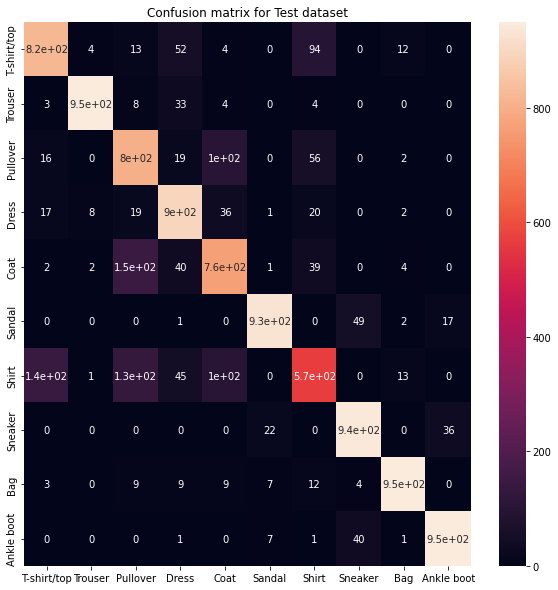

In [ ]:
plot_local_confmat(y_t, y_pred)

<h1>8. Comparing Squared loss and Cross Entropy loss</h1>


Here we are trying to compare which loss function is better i.e., cross entropy loss or squared loss.<br> <br>
We again run a hyperparameter sweep but this time also including loss function as one of the hyperparameters. Using this we can easily compare both the loss functions at once and arrive at a correct decision.<br> <br>

We have not used "bayes" method here and preferred "random" method because "bayes" method is kindof heuristic and will slowly stop using the loss function that is not performing well.

In [ ]:
def compare():

  '''This function is used to exploit the wandb hyperparameter sweep 
  function to get the best hyperparameters.

  This is used to compare the two loss functions. Its same as the previous code
  but with added loss functions as hyperparameters.

  It takes in no inputs and gives no outputs.
  
  Instead it logs everything into the wandb workspace'''

  config_defaults = {
      'number_hidden_layers': 2,
      'number_neurons': 32,
      'learning_rate': 0.001,
      'initialization_type': "xavier",
      'activation_function':'sigmoid',
      'mini_batch_size' : 64,
      'max_epochs': 5,
      'lambd': 0,
      'optimization_function': "adam",
      'loss_function': "cross_entropy"
      
  }

  wandb.init(config=config_defaults)
  config = wandb.config


  #Forming the layer_sizes i.e., the architecture of our neural network
  layer_sizes = [784]
  for i in range(config.number_hidden_layers):
    layer_sizes = layer_sizes + [config.number_neurons]
  layer_sizes  = layer_sizes + [10]

  #Collecting all the hyperparameters from the wandb run
  learning_rate = config.learning_rate
  initialization_type = config.initialization_type
  activation_function = config.activation_function
  loss_function = config.loss_function
  mini_batch_size = config.mini_batch_size
  max_epochs = config.max_epochs
  lambd = config.lambd
  opt_fun = config.optimization_function

  #Calling the respective hyperparameters
  if opt_fun == "adam":
    optimization_function = adam
  elif opt_fun == "nadam":
    optimization_function = nadam
  elif opt_fun == "mini_batch_gd":
    optimization_function = mini_batch_gd
  elif opt_fun == "momentum_gd":
    optimization_function = momentum_gd
  elif opt_fun == "nesterov_gd":
    optimization_function = nesterov_gd
  elif opt_fun == "rmsprop":
    optimization_function = rmsprop
  else:
    print("Wrong optimization function")
    exit()

  #Forming meaningful run name using the hyperparameters

  name_run = str(learning_rate) + "_" + initialization_type[0] + "_" + \
  activation_function[0] + "_" + str(mini_batch_size) + "_" + str(max_epochs) + \
  "_" + str(lambd) + "_" + opt_fun[:4]

  wandb.run.name = name_run
  wandb_log=True
  #Calling the fit function to train the neural network with the current hyperparameters
  parameters = fit(X_train, y_train, layer_sizes,wandb_log, learning_rate, initialization_type, activation_function, loss_function, mini_batch_size, max_epochs, lambd, optimization_function)

  
  wandb.run.save()
  wandb.run.finish()

In [ ]:
def loss_compare_sweeper(entity_name,project_name):
  #Declaring the dictionary of all choices for the hyperparameters.
  hyperparameters = {
      "learning_rate":{
        'values': [0.001, 0.0001]
      },

      "number_hidden_layers": {
          'values' : [3, 4, 5]
      },

      "number_neurons": {
        'values': [32, 64, 128]
      },

      "initialization_type": {
          'values' : ["xavier", "random"]
      },

      "activation_function": {
          'values': ["sigmoid", "tanh", "relu"]
      },

      "mini_batch_size": {
          'values': [16,32,64]
      },

      "max_epochs": {
          'values': [5, 10, 15]
      },

      "lambd": {
          'values': [0, 0.0005, 0.5]
      },

      "optimization_function": {
          'values': ["mini_batch_gd", "momentum_gd", "nesterov_gd", "rmsprop", "adam", "nadam"]
      },

      "loss_function": {
          'values': ["cross_entropy", "squared_loss"]
      }


  }


  #Using random method for hyperparameter sweeps 
  sweep_config = {
      'method' : 'random',
      'metric' :{
          'name': 'Validation_Accuracy',
          'goal': 'maximize'
      },
      'parameters': hyperparameters
  }
  sweep_id = wandb.sweep(sweep_config, entity=entity_name,project=project_name)
  wandb.agent(sweep_id, compare, count = 50)

In [ ]:
loss_compare_sweeper(entity_name,project_name)

<h1>10. MNIST Trials </h1>

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. It contains 60,000 training images and 10,000 testing images. Each image is of the size 28*28 pixels.<br>
Source: https://en.wikipedia.org/wiki/MNIST_database
<br> <br>
We are using the hyperparameters tuned for the Fashion-MNIST dataset and trying to build models to recognize the handwritten digits of the MNIST Dataset. <br>
The main aim is to check whether the learnings from one image classification task can be applied to another task or not.

In [ ]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
#sklearn library is used only for train test validation split


def prepare_data_mnist():

  '''This function is used to load the data, define the class labels, performing
      the train-test-validation split, normalizing the data, flattening each data
      point, converting the class labels to one hot encoded vector.

      It return all the split data sets '''

  # Loading data from online source
  (train_x,train_y),(test_x,test_y)=mnist.load_data()

  # Defining labels for data
  num_classes = 10
  labels=[i for i in range(10)]

  print("Number of data points in train data (initially) - ", len(train_x))
  print("Number of data points in test data (initially) - ", len(test_x))

  #performing the train-validation split
  train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=40)
  print("Shape of each image - 28x28" )
  image_shape=train_x.shape[1]*train_x.shape[2]
  print("shape of each image (1D) - ",image_shape)

  #storing the number of points in each set
  train_image_count=len(train_x)
  val_image_count = len(val_x)
  test_image_count=len(test_x)

  # Creating a matrix of image data 
  # each image is represented as a row by flattening the matrix: converting (60000,28,28) tensor to (60000,784) matrix
  X_train=np.zeros((train_image_count,image_shape))
  X_val=np.zeros((val_image_count,image_shape))
  X_test=np.zeros((test_image_count,image_shape))

  # converting the images into grayscale by normalizing
  for i in range(train_image_count):
    X_train[i]=(copy.deepcopy(train_x[i].flatten()))/255.0 
  for i in range(val_image_count):
    X_val[i]=(copy.deepcopy(val_x[i].flatten()))/255.0
  for i in range(test_image_count):
    X_test[i]=(copy.deepcopy(test_x[i].flatten()))/255.0
    
  #One hot encoding the label vectors to represent a probability distribution
  y_train = np.zeros((train_y.size, 10))
  y_train[np.arange(train_y.size), train_y] = 1

  y_val = np.zeros((val_y.size, 10))
  y_val[np.arange(val_y.size), val_y] = 1

  y_test = np.zeros((test_y.size, 10))
  y_test[np.arange(test_y.size), test_y] = 1

  

  #returning all the datasets along with the labels
  return X_train,X_val,X_test,y_train,y_val,y_test,labels
  

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test, lab = prepare_data_mnist()

Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
shape of each image (1D) -  784


In [ ]:
def custom_config_mnist(mnist_config,wandb_log, config_number):

  '''This function is used to train the neural network for the given hyperparameter
  configuration and also evaluate the model finally logging the results onto 
  Wandb.

  We have essentially used three hyperparameter configurations that were chosen
  after thorough exploration from the Fashion MNIST dataset.'''


  #Forming the network archtecture and storing it in the list.
  num_layers=mnist_config["number_hidden_layers"]
  neurons=mnist_config["number_neurons"]
  layer_sizes = [784]
  for i in range(num_layers):
    layer_sizes = layer_sizes + [neurons]
  layer_sizes  = layer_sizes + [10]
  
  # For local testing purposes, wandb_log is set to False. Then it doesnt log the
  # results to the wandb workspace. Instead it prints here.
  if (wandb_log== True):
      #initializing the run
      wandb.init(config=mnist_config, project = project_name, entity=entity_name)
      config = wandb.config
      #storing the hyperparameters in local variables
      opt_fun = config.optimization_function

      #Choosing the correct optimization function
      if opt_fun == "adam":
          optimization_function = adam
      elif opt_fun == "nadam":
          optimization_function = nadam
      elif opt_fun == "mini_batch_gd":
          optimization_function = mini_batch_gd
      elif opt_fun == "momentum_gd":
          optimization_function = momentum_gd
      elif opt_fun == "nesterov_gd":
          optimization_function = nesterov_gd
      elif opt_fun == "rmsprop":
          optimization_function = rmsprop
      else:
          print("Wrong optimization function")
          exit()

      wandb.run.name = "Mnist_Config_"+str(config_number)

      #calling the fit function to train the model using the best hyperparamters obtained from above
      parameters = fit(X_train, y_train, layer_sizes,wandb_log, 
                     mnist_config["learning_rate"],
                     mnist_config["weight_type"], 
                     mnist_config["activation_function"], 
                     mnist_config["loss_function"],
                     mnist_config["mini_batch_size"],
                     mnist_config["max_epochs"], 
                     mnist_config["lambd"],
                     optimization_function)
      res = predict(X_test,y_test,parameters, mnist_config["activation_function"], layer_sizes)
        # Converting the one hot encoded vectors back to label_id's
      y_t=[]
      for k in range(len(y_test)):
          y_t.append(y_test[k].argmax())

      y_pred=[]
      for k in range(len(res)):
          y_pred.append(res[k].argmax())

      #calculating the test accuracy using the test data
      test_accuracy=calc_test_accuracy(y_pred,y_t)
      print("Test accuracy:",test_accuracy)

      wandb.log({"conf_mat":wandb.plot.confusion_matrix(preds=y_pred,y_true=y_t,class_names=labels),"Test Accuracy": test_accuracy})

      wandb.run.save()
      wandb.run.finish()

  else:
    #Forming the layer_sizes i.e., the architecture of our neural network
      optimizer=mnist_config["optimization_function"]
      
      if optimizer == "adam":
          opti = adam
      elif optimizer == "nadam":
          opti = nadam
      elif optimizer == "mini_batch_gd":
          opti = mini_batch_gd
      elif optimizer == "momentum_gd":
          opti = momentum_gd
      elif optimizer == "nesterov_gd":
          opti = nesterov_gd
      elif optimizer == "rmsprop":
          opti = rmsprop
      else:
          print("Wrong optimization function")
          exit()

      parameters = fit(X_train, y_train, layer_sizes,wandb_log, 
                     mnist_config["learning_rate"],
                     mnist_config["weight_type"], 
                     mnist_config["activation_function"], 
                     mnist_config["loss_function"],
                     mnist_config["mini_batch_size"],
                     mnist_config["max_epochs"], 
                     mnist_config["lambd"],
                     opti)
      res = predict(X_test,y_test,parameters, mnist_config["activation_function"], layer_sizes)

      y_t=[]
      for k in range(len(y_test)):
          y_t.append(y_test[k].argmax())

      y_pred=[]
      for k in range(len(res)):
          y_pred.append(res[k].argmax())

      #calculating the test accuracy using the test data
      test_accuracy=calc_test_accuracy(y_pred,y_t)
      print("Test accuracy:",test_accuracy)

    

<h4> Configuration 1</h4>

In [ ]:
# Change these values to get the required configuration's result

config1 = {
            'number_hidden_layers': 5,
            'number_neurons': 128,
            'learning_rate': 0.0001,
            'weight_type': "xavier",
            'activation_function':"relu",
            'mini_batch_size' : 16,
            'max_epochs': 20,
            'lambd': 0.0005,
            'optimization_function': "nadam",
            'loss_function': "cross_entropy"
              }

In [ ]:
custom_config_mnist(config1, True, 1)

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


100%|██████████| 20/20 [27:17<00:00, 81.87s/it]


99.92962962962963
97.48333333333333


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


Test accuracy: 97.48


Train_Accuracy,▁▄▅▆▆▇▇▇▇▇▇█████████
Train_Loss,█▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▅▆▇▇▇▇▇████████████
Validation_loss,█▃▂▁▁▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,99.92963
Train_Loss,0.0053
Validation_Accuracy,97.48333
Validation_loss,0.12026
epoch,19


<h4>Configuration 2</h4>

In [ ]:
config2 = {
            'number_hidden_layers': 5,
            'number_neurons': 128,
            'learning_rate': 0.0001,
            'weight_type': "xavier",
            'activation_function':"relu",
            'mini_batch_size' : 64,
            'max_epochs': 20,
            'lambd': 0.0005,
            'optimization_function': "nesterov_gd",
            'loss_function': "cross_entropy"
              }

In [ ]:
custom_config_mnist(config2, True, 2)

wandb: Currently logged in as: safikhan (use `wandb login --relogin` to force relogin)


100%|██████████| 20/20 [23:46<00:00, 71.34s/it]


99.38703703703705
97.08333333333333


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


Test accuracy: 97.00999999999999


Train_Accuracy,▁▄▅▅▆▆▅▇▇▇▇▇▇███▇███
Train_Loss,█▅▄▄▃▃▄▂▂▂▂▁▁▁▁▁▂▁▁▁
Validation_Accuracy,▁▄▆▅▆▆▅▇▇▇▇▇████▇██▇
Validation_loss,█▃▁▂▂▁▄▁▁▁▃▃▃▂▃▃▆▄▅▅
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,99.38704
Train_Loss,0.01921
Validation_Accuracy,97.08333
Validation_loss,0.15636
epoch,19


<h4>Configuration 3</h4>

In [ ]:
config3 = {
            'number_hidden_layers': 4,
            'number_neurons': 64,
            'learning_rate': 0.0001,
            'weight_type': "xavier",
            'activation_function':"relu",
            'mini_batch_size' : 32,
            'max_epochs': 20,
            'lambd': 0,
            'optimization_function': "momentum_gd",
            'loss_function': "cross_entropy"
              }

In [ ]:
custom_config_mnist(config3, True, 3)

100%|██████████| 20/20 [12:09<00:00, 36.47s/it]


99.01111111111112
96.73333333333333
Test accuracy: 96.67


Train_Accuracy,▁▃▄▅▆▆▇▇▇▇▇▇▇▇████▇█
Train_Loss,█▆▅▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▇▇▇█████▇████▇▇
Validation_loss,█▅▃▂▁▁▁▁▁▂▂▂▂▃▃▃▃▄▆▅
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,99.01111
Train_Loss,0.02866
Validation_Accuracy,96.73333
Validation_loss,0.15765
epoch,19
